<a href="https://colab.research.google.com/github/Cleverson-Andrade/analise-produtividade-agro-brasil/blob/main/analise_agro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Projeto Agro: Análise de Produtividade Agrícola Brasileira

Este projeto analisa dados históricos de produtividade de grãos no Brasil, focando em identificar os grãos mais produtivos e a evolução tecnológica do milho na última década.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
df = pd.read_csv('yield.csv')

In [167]:
df.head()

,Unnamed: 0,Grain,Year,Alta Floresta D'Oeste (RO),Ariquemes (RO),Cabixi (RO),Cacoal (RO),Cerejeiras (RO),Colorado do Oeste (RO),Corumbiara (RO),...,Uruaçu (GO),Uruana (GO),Urutaí (GO),Valparaíso de Goiás (GO),Varjão (GO),Vianópolis (GO),Vicentinópolis (GO),Vila Boa (GO),Vila Propício (GO),Brasília (DF)
0,0,Sorghum,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Wheat,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sorghum,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wheat,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sorghum,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Columns: 5566 entries, Unnamed: 0 to Brasília (DF)
dtypes: float64(5563), int64(2), object(1)
memory usage: 19.5+ MB


In [169]:
# Ver o nome das primeiras 10 colunas

print(df.columns[:10])

# Ver as primeiras 5 linhas das primeiras 10 colunas,
print(df.iloc[:5, :10])

Index(['Unnamed: 0', 'Grain', 'Year', 'Alta Floresta D'Oeste (RO)',
       'Ariquemes (RO)', 'Cabixi (RO)', 'Cacoal (RO)', 'Cerejeiras (RO)',
       'Colorado do Oeste (RO)', 'Corumbiara (RO)'],
      dtype='object')
   Unnamed: 0    Grain  Year  Alta Floresta D'Oeste (RO)  Ariquemes (RO)  \
0           0  Sorghum  1974                         NaN             NaN   
1           1    Wheat  1974                         NaN             NaN   
2           2  Sorghum  1975                         NaN             NaN   
3           3    Wheat  1975                         NaN             NaN   
4           4  Sorghum  1976                         NaN             NaN   

   Cabixi (RO)  Cacoal (RO)  Cerejeiras (RO)  Colorado do Oeste (RO)  \
0          NaN          NaN              NaN                     NaN   
1          NaN          NaN              NaN                     NaN   
2          NaN          NaN              NaN                     NaN   
3          NaN          NaN           

## Tratamento e Reestruturação de Dados
A base original apresentava municípios em colunas. Foi utilizada a técnica de Melt para transformar os dados para o formato longo, facilitando a análise estatística.

In [170]:
# Removendo a coluna desnecessária
df = df.drop(columns=['Unnamed: 0'])

# Transformando colunas de cidades em linhas (Melt)
# id_vars são as colunas que ficam fixas. value_vars são as que serão "derretidas"
df_long = df.melt(id_vars=['Grain', 'Year'],
                  var_name='Município',
                  value_name='Produtividade')

# Removendo valores nulos apra limpar base
df_long = df_long.dropna(subset=['Produtividade'])

#Visualizar novo resultado
print(df_long.head())
print(df_long.info())



     Grain  Year                   Município  Produtividade
118  Maize  1987  Alta Floresta D'Oeste (RO)            1.6
120  Maize  1988  Alta Floresta D'Oeste (RO)            1.6
122  Maize  1989  Alta Floresta D'Oeste (RO)            1.6
124  Maize  1990  Alta Floresta D'Oeste (RO)            1.6
126  Maize  1991  Alta Floresta D'Oeste (RO)            1.6
<class 'pandas.core.frame.DataFrame'>
Index: 588688 entries, 118 to 2558979
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Grain          588688 non-null  object 
 1   Year           588688 non-null  int64  
 2   Município      588688 non-null  object 
 3   Produtividade  588688 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 22.5+ MB
None


In [171]:
# Alterar nome das colunas
df_long = df_long.rename(columns={'Grain': 'Grão', 'Year': 'Ano'})

In [172]:
df_long.columns

Index(['Grão', 'Ano', 'Município', 'Produtividade'], dtype='object')

## Análise Estatística e Insights

Agrupamento dos dados para identificar a média histórica de produtividade por tipo de grão e filtragem específica para a cultura do milho.

In [173]:
# Agrupando por Grão e calculando a média da Produtividade
ranking_graos = df_long.groupby('Grão')['Produtividade'].mean().sort_values(ascending=False)

# Exibindo o resultado
print('Média de produtividade por Grão')
print(ranking_graos)

Média de produtividade por Grão
Grão
Soybeans      2.251548
Maize         2.231760
Sorghum       2.111452
Pea           2.093191
Barley        1.769077
Wheat         1.731489
Oats          1.301077
Rye           1.099752
Beans         0.681986
Fava Beans    0.400503
Name: Produtividade, dtype: float64


In [174]:
#Ver a produtividade do Milho (Maize) nos últimos 10 anos
# Filtre os dados apenas para 'Maize' e anos maiores que 2010
maize_recent = df_long[(df_long['Grão'] == 'Maize') & (df_long['Ano'] > 2010)]
print("\nEvolução da média de produtividade do Milho por ano:")
print(maize_recent.groupby('Ano')['Produtividade'].mean())


Evolução da média de produtividade do Milho por ano:
Ano
2011    3.067306
2012    3.135569
2013    3.423750
2014    3.339606
2015    3.614041
2016    3.415721
2017    3.810284
2018    3.680101
2019    3.823797
Name: Produtividade, dtype: float64


## Visualização de Resultados

Geração de gráficos para comunicação visual dos insights obtidos.

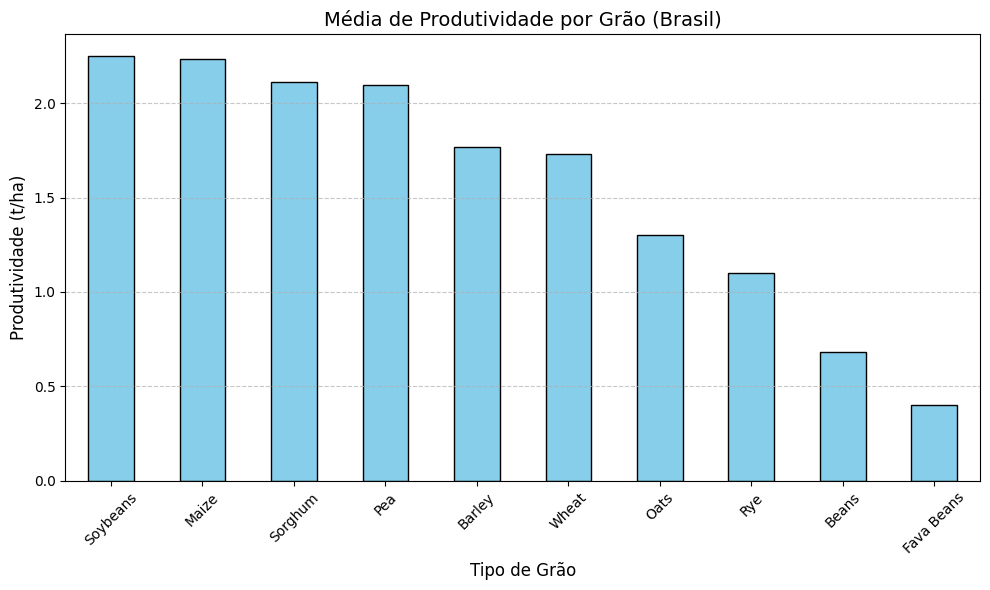

In [175]:
# Gráfico de Barras: Média de Produtividade por Grão

plt.figure(figsize=(10, 6))
ranking_graos.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Média de Produtividade por Grão (Brasil)', fontsize=14)
plt.ylabel('Produtividade (t/ha)', fontsize=12)
plt.xlabel('Tipo de Grão', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



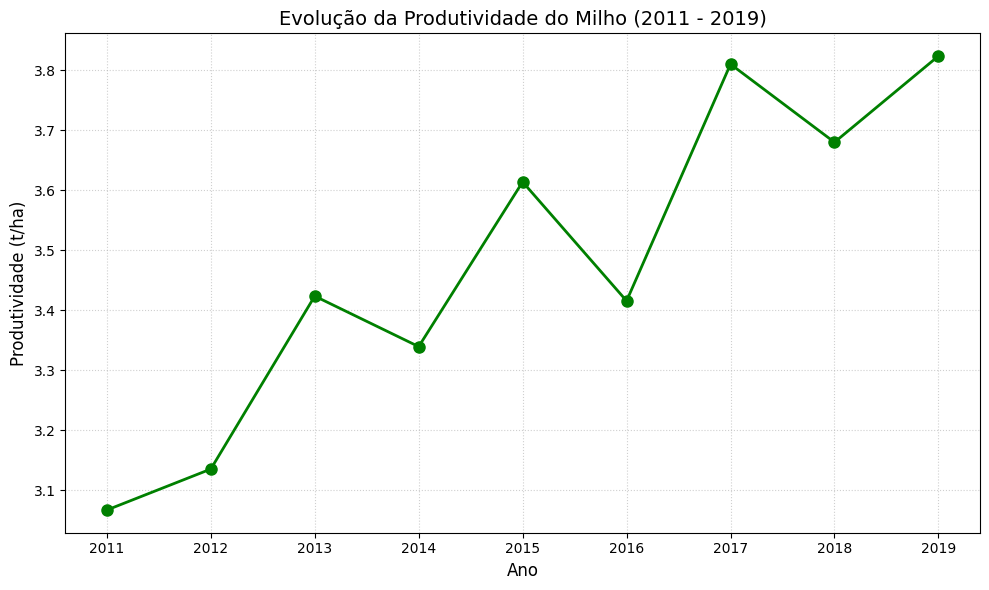

In [176]:
# Gráfico de Linha: Evolução da Produtividade do Milho (2011-2019)
maize_trend = maize_recent.groupby('Ano')['Produtividade'].mean()

plt.figure(figsize=(10, 6))
maize_trend.plot(kind='line', marker='o', color='green', linewidth=2, markersize=8)
plt.title('Evolução da Produtividade do Milho (2011 - 2019)', fontsize=14)
plt.ylabel('Produtividade (t/ha)', fontsize=12)
plt.xlabel('Ano', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig('evolucao_milho.png')
plt.show()

## Processamento da Base de Produção Total
Nesta etapa, carregamos e tratamos a base de dados de volume total produzido (production.csv), aplicando a mesma reestruturação (Melt) para garantir a compatibilidade com a base de produtividade.

In [177]:
# Carregando o arquivo de Produção
df_prod = pd.read_csv('production.csv')

# Limpando e transformando (Melt) igual o que foi feito no Ano(Year)
df_prod = df_prod.drop(columns=['Unnamed: 0'])
df_prod_long = df_prod.melt(id_vars=['Grain', 'Year'],
                           var_name='Município',
                           value_name='Produção_Total')

# Remover nulos
df_prod_long = df_prod_long.dropna(subset=['Produção_Total'])

# Renomear para português
df_prod_long = df_prod_long.rename(columns={'Grain': 'Grão', 'Year': 'Ano'})

# Visualizar se deu certo
print(df_prod_long.head())

      Grão   Ano                   Município  Produção_Total
118  Maize  1987  Alta Floresta D'Oeste (RO)             1.6
120  Maize  1988  Alta Floresta D'Oeste (RO)             1.6
122  Maize  1989  Alta Floresta D'Oeste (RO)             1.6
124  Maize  1990  Alta Floresta D'Oeste (RO)             1.6
126  Maize  1991  Alta Floresta D'Oeste (RO)             1.6


## Integração e Consolidação de Dados (Merge)
Realizamos a união das bases utilizando um inner join. O resultado é um conjunto de dados consolidado que permite analisar, em uma única visão, a relação entre a eficiência (Produtividade) e a escala (Produção Total).

In [178]:
# Unindo as duas tabelas (Merge)
# Usando o 'inner' para garantir que só fiquem registros que existam em ambas
df_final = pd.merge(df_long, df_prod_long,
                    on=['Grão', 'Ano', 'Município'],
                    how='inner')

## Visualização da Base Consolidada

Amostra das primeiras linhas do conjunto de dados após a integração das métricas de produtividade e produção total.

In [179]:
# Mostrar as 5 primeiras linhas
print("Amostra dos Dados Integrados:")
display(df_final.head())

Amostra dos Dados Integrados:


,Grão,Ano,Município,Produtividade,Produção_Total
0,Maize,1987,Alta Floresta D'Oeste (RO),1.6,1.6
1,Maize,1988,Alta Floresta D'Oeste (RO),1.6,1.6
2,Maize,1989,Alta Floresta D'Oeste (RO),1.6,1.6
3,Maize,1990,Alta Floresta D'Oeste (RO),1.6,1.6
4,Maize,1991,Alta Floresta D'Oeste (RO),1.6,1.6


## Análise Estatística Descritiva

Visão geral das principais métricas estatísticas (média, desvio padrão, valores mínimos e máximos) para validação da distribuição dos dados numéricos.

In [180]:
# Gerar uma tabela de resumo estatístico
print("\nResumo Estatístico das Variáveis Numéricas:")
display(df_final.describe().T)


Resumo Estatístico das Variáveis Numéricas:


,count,mean,std,min,25%,50%,75%,max
Ano,588688.0,1998.029082,12.988562,1974.000,1987.000000,1999.0,2009.0,2019.0
Produtividade,588688.0,1.569516,1.441997,0.001,0.523681,1.1,2.2,60.0
Produção_Total,588688.0,1.569516,1.441997,0.001,0.523681,1.1,2.2,60.0


## Maiores Polos Produtores Históricos
Identificação dos 10 municípios brasileiros com o maior volume acumulado de produção total no período analisado, destacando a força do Paraná e Rio Grande do Sul no setor.

In [181]:
# Criando um Top 10 de Municípios com maior Produção Total histórica
top_municipios = df_final.groupby('Município')['Produção_Total'].sum().sort_values(ascending=False).head(10).reset_index()
print("\nTop 10 Municípios em Volume de Produção Total (Histórico):")
display(top_municipios)


Top 10 Municípios em Volume de Produção Total (Histórico):


,Município,Produção_Total
0,Castro (PR),870.983271
1,Ponta Grossa (PR),837.053846
2,Guarapuava (PR),767.754189
3,Tibagi (PR),760.156102
4,Santa Bárbara do Sul (RS),720.360674
5,Arapoti (PR),716.954640
6,Brasília (DF),716.380152
7,Palmeira (PR),714.815352
8,Pinhão (PR),714.064649
9,Vacaria (RS),702.628048
